# **Data Exploration & Visualization**

## **Task-1: Total Transactions per Customer**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from pathlib import Path

In [ ]:
def load_data(path: Path) -> pd.DataFrame:
    """Load data from a directory with multiple CSV files or a single CSV file.

    Args:
        path (Path): Path to a CSV file or a directory containing CSV files.

    Returns:
        pd.DataFrame: Data loaded from the CSV file(s).
    """
    path = Path(path)

    if path.is_file():
        # If the path is a file, read the single CSV file
        return pd.read_csv(path)
    elif path.is_dir():
        # If the path is a directory, list all CSV files in the directory
        csv_files = list(path.glob("*.csv"))

        # Read each CSV file and concatenate into a single DataFrame
        dataframes = [pd.read_csv(csv_file) for csv_file in csv_files]

        # Concatenate all DataFrames
        combined_df = pd.concat(dataframes, ignore_index=True)

        return combined_df
    else:
        raise ValueError("The provided path is neither a file nor a directory.")

In [ ]:
def total_number_transactions(data: pd.DataFrame) -> pd.DataFrame:
    """Return the total number of transactions per customer.

    Args:
        data (pd.DataFrame): Data containing customer transactions

    Returns:
        pd.DataFrame: Total number of transactions per customer, sorted in descending order
    """
    # Group by customer_id and count the transactions
    transaction_counts = data.groupby('customer_id').size().reset_index(name='total_transactions')
    # Sort in descending order by the number of transactions
    transaction_counts = transaction_counts.sort_values(by='total_transactions', ascending=False)

    return transaction_counts

In [ ]:
def create_plot(transaction_counts: pd.DataFrame) -> None:
    """Create a plot showing the total number of transactions per customer.

    Args:
        transaction_counts (pd.DataFrame): Data containing the transaction count per customer
    """
    plt.figure(figsize=(10, 6))
    plt.bar(transaction_counts['customer_id'].astype(str), transaction_counts['total_transactions'], color='skyblue')
    plt.xlabel('Customer ID')
    plt.ylabel('Total Transactions')
    plt.title('Total Transactions per Customer (Descending)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

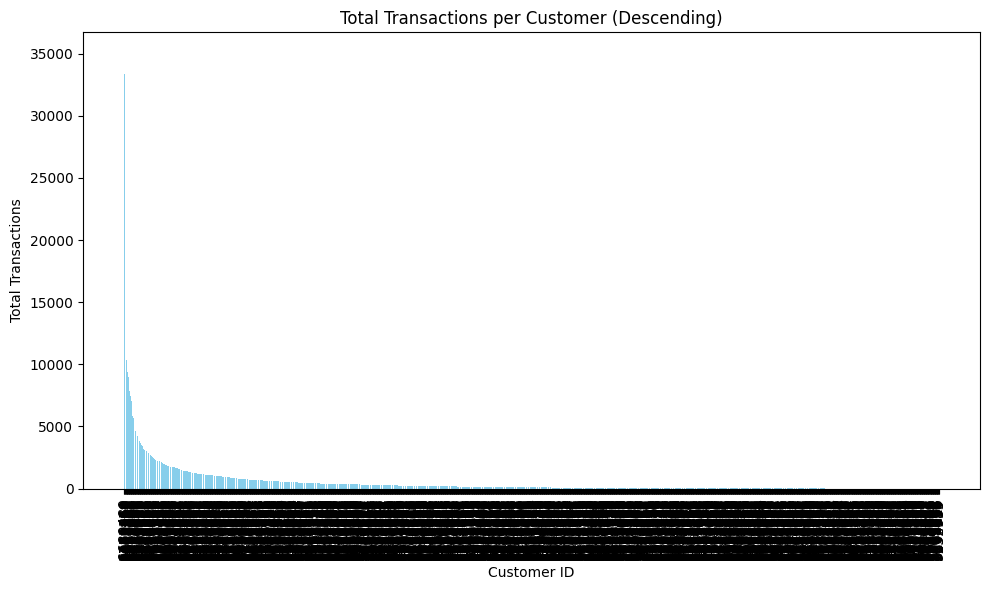

In [ ]:
# Load datasets directly without chunking
data = load_data(Path("/content/drive/MyDrive/MACHINE_LEARNING/MISSION_DATACHEF/dataset/"))

# Process data to compute total transactions per customer
transaction_counts = total_number_transactions(data)

# Create the plot for the entire dataset
create_plot(transaction_counts)

In [ ]:
def segment_customers_by_transactions(transaction_counts: pd.DataFrame, num_segments: int = 10) -> pd.DataFrame:
    """
    Segment customers into classes based on their transaction counts using quantile-based segmentation.

    Args:
        transaction_counts (pd.DataFrame): Data containing the transaction count per customer
        num_segments (int): Number of customer segments to divide into

    Returns:
        pd.DataFrame: Segmented summary of customers
    """
    transaction_counts['segment'] = pd.qcut(transaction_counts['total_transactions'], num_segments)
    segment_summary = transaction_counts.groupby('segment').agg(
        total_transactions=('total_transactions', 'sum'),
        customer_count=('customer_id', 'size'),
        min_transactions=('total_transactions', 'min'),
        max_transactions=('total_transactions', 'max')
    ).reset_index()

    return segment_summary

In [ ]:
def add_roman_numeral_labels(segment_summary: pd.DataFrame, num_segments: int = 10) -> pd.DataFrame:
    """
    Add Roman numeral labels to customer segments and sort them.

    Args:
        segment_summary (pd.DataFrame): Segmented summary of customers
        num_segments (int): Number of segments to create labels for

    Returns:
        pd.DataFrame: Data with Roman numeral labels for each segment
    """
    roman_labels = ['X', 'IX', 'VIII', 'VII', 'VI', 'V', 'IV', 'III', 'II', 'I']
    segment_summary['segment_label'] = roman_labels[:num_segments]
    segment_summary['transaction_range'] = segment_summary['min_transactions'].astype(str) + ' - ' + segment_summary['max_transactions'].astype(str)

    return segment_summary.sort_values(by='total_transactions', ascending=False)

In [ ]:
def plot_customer_segments(plot_summary: pd.DataFrame) -> None:
    """
    Create a bar plot showing total transactions for each customer segment.

    Args:
        plot_summary (pd.DataFrame): Data summary for plotting
    """
    plt.figure(figsize=(10, 6))
    plt.bar(plot_summary['segment_label'], plot_summary['total_transactions'], color='skyblue')
    plt.xlabel('Customer Classes (I to X)')
    plt.ylabel('Total Transactions')
    plt.title('Total Transactions per Customer Segment (Descending)')
    plt.tight_layout()
    plt.show()

In [ ]:
def create_customer_segment_table(table_summary: pd.DataFrame) -> list:
    """
    Prepare data for the table showing customer segments and their summary.

    Args:
        table_summary (pd.DataFrame): Segmented summary of customers

    Returns:
        list: Table data ready for plotting
    """
    table_data = table_summary[['segment_label', 'customer_count', 'total_transactions', 'transaction_range']].values.tolist()

    # Add row for TOTAL
    total_customers = table_summary['customer_count'].sum()
    total_transactions = table_summary['total_transactions'].sum()
    overall_min_transactions = table_summary['min_transactions'].min()
    overall_max_transactions = table_summary['max_transactions'].max()

    total_row = ['TOTAL', total_customers, total_transactions, f'{overall_min_transactions} - {overall_max_transactions}']
    table_data.append(total_row)

    return table_data

In [ ]:
def plot_table_and_segments(plot_summary: pd.DataFrame, table_summary: pd.DataFrame, table_data: list) -> None:
    """
    Plot the customer segments and display a summary table.

    Args:
        plot_summary (pd.DataFrame): Data summary for plotting
        table_summary (pd.DataFrame): Data summary for table
        table_data (list): Formatted table data
    """
    fig = plt.figure(figsize=(15, 8))
    gs = GridSpec(2, 1, height_ratios=[3, 1])

    # Plot on ax0 (Top part)
    ax0 = fig.add_subplot(gs[0])
    ax0.bar(plot_summary['segment_label'], plot_summary['total_transactions'], color='skyblue')
    ax0.set_xlabel('Customer Classes (I to X)')
    ax0.set_ylabel('Total Transactions')
    ax0.set_title('Total Transactions per Customer Segment (Descending)')
    ax0.tick_params(axis='x', rotation=0)

    # Create the table on ax1 (Bottom part)
    ax1 = fig.add_subplot(gs[1])
    ax1.axis('tight')
    ax1.axis('off')

    table_column_labels = ['Customer Class', 'Total Customers', 'Total Transactions', 'Transaction Range (Min to Max)']
    table = ax1.table(cellText=table_data, colLabels=table_column_labels, cellLoc='center', loc='center')

    # Format and show the table
    table.scale(1.1, 2)
    table.auto_set_font_size(False)
    table.set_fontsize(12)

    # Format header and total row
    for key, cell in table.get_celld().items():
        if key[0] == 0:  # Header row formatting
            cell.set_fontsize(12)
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('gray')
        elif key[0] == len(table_data):  # TOTAL row formatting
            cell.set_fontsize(12)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('lightblue')  # Highlight the TOTAL row
        else:  # Alternate row colors for data rows
            if key[0] % 2 == 0:
                cell.set_facecolor('#f5f5f5')  # Light gray for alternate rows
            else:
                cell.set_facecolor('white')  # White for others

    plt.tight_layout()
    plt.show()

<ipython-input-7-7a9e6414bed8>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = transaction_counts.groupby('segment').agg(


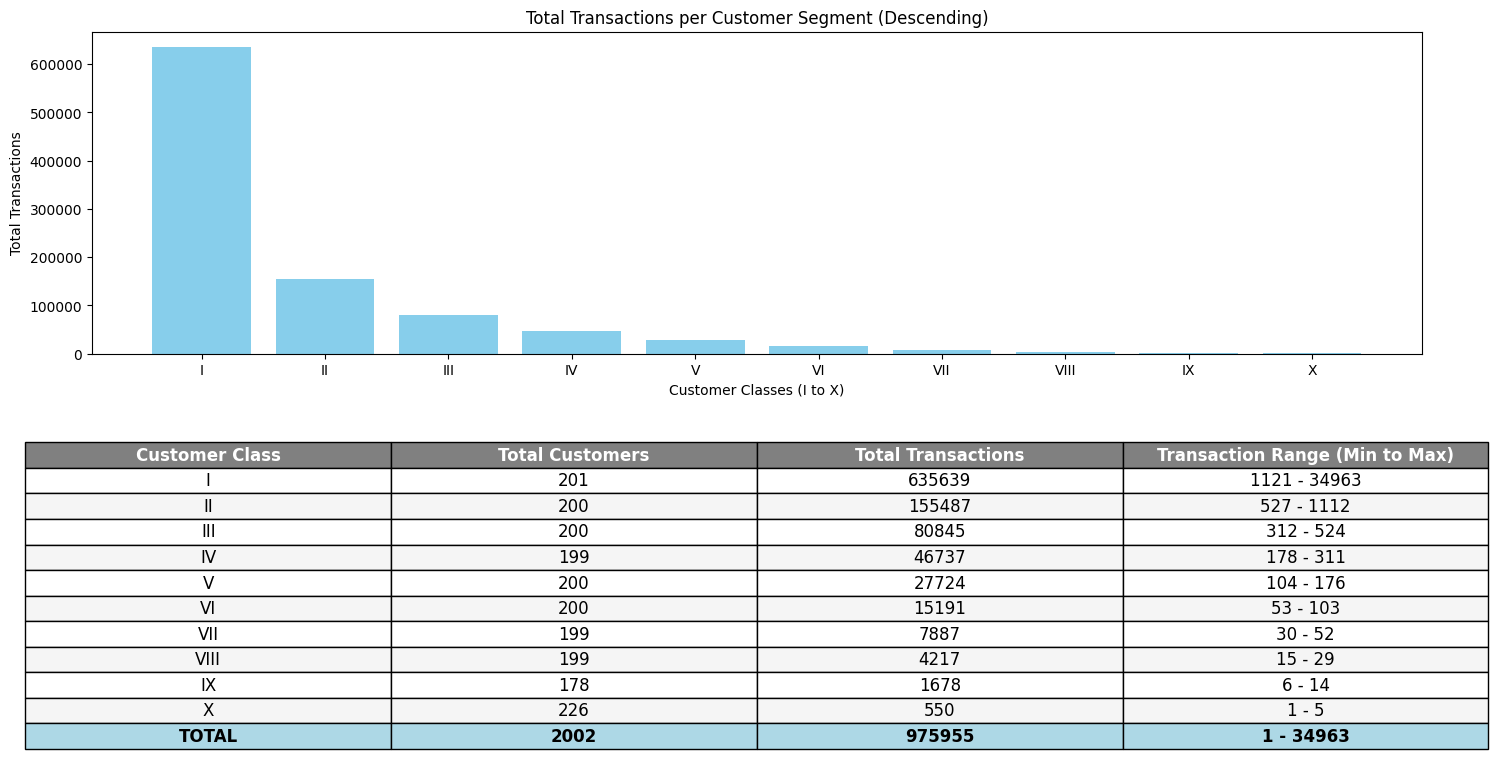

In [ ]:
# Segment customers
segment_summary = segment_customers_by_transactions(transaction_counts)
plot_summary = add_roman_numeral_labels(segment_summary)

# Prepare table data and plot
table_data = create_customer_segment_table(plot_summary)
plot_table_and_segments(plot_summary, plot_summary, table_data)

## **Task-2: Product Transaction Frequency**

In [ ]:
def transactions_frequency(data: pd.DataFrame, product_id: str, year: str) -> pd.DataFrame:
    """Return transaction frequency per month for a product id in a year.

    Args:
        data (pd.DataFrame): Data containing transactions
        product_id (str): Product ID
        year (str): Year (in 'YYYY' format)

    Returns:
        pd.DataFrame: Transaction frequency per month for a product id in a year
    """

    # Convert 'date' column to datetime if not already in datetime format
    if not pd.api.types.is_datetime64_any_dtype(data['date']):
        data['date'] = pd.to_datetime(data['date'])

    # Filter data for the specified product_id and year
    filtered_data = data[
        (data['product_id'] == product_id) & (data['date'].dt.year == int(year))
    ]

    # Group by month and count transactions
    monthly_frequency = filtered_data.groupby(filtered_data['date'].dt.month).size().reset_index(name='frequency')

    # Rename the first column to 'month' (it's actually the month index)
    monthly_frequency.columns = ['month', 'frequency']

    # Group by month and count transactions
    monthly_frequency['month'] = monthly_frequency['month'].astype(int)
    monthly_frequency['frequency'] = monthly_frequency['frequency'].astype(int)

    return monthly_frequency

In [ ]:
def plot_transactions_frequency(monthly_frequency: pd.DataFrame, product_id: str, year: str) -> None:
    """Create a slick plot for the transaction frequency per month for a product id.

    Args:
        monthly_frequency (pd.DataFrame): Data containing transaction frequency per month
        product_id (str): Product ID
        year (str): Year (in 'YYYY' format)
    """
    plt.figure(figsize=(10, 6))

    # Create a bar plot with enhanced styling
    sns.barplot(x=monthly_frequency['month'], y=monthly_frequency['frequency'], palette='coolwarm', edgecolor='black')

    # Add labels and title
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Transaction Frequency', fontsize=12)
    plt.title(f'Transaction Frequency for Product {product_id} in {year}', fontsize=14)

    # Add numerical labels on top of each bar
    for index, value in enumerate(monthly_frequency['frequency']):
        plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

    # Set ticks and style
    plt.xticks(monthly_frequency['month'] - 1, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

<ipython-input-14-4d25ba06e764>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_frequency['month'], y=monthly_frequency['frequency'], palette='coolwarm', edgecolor='black')


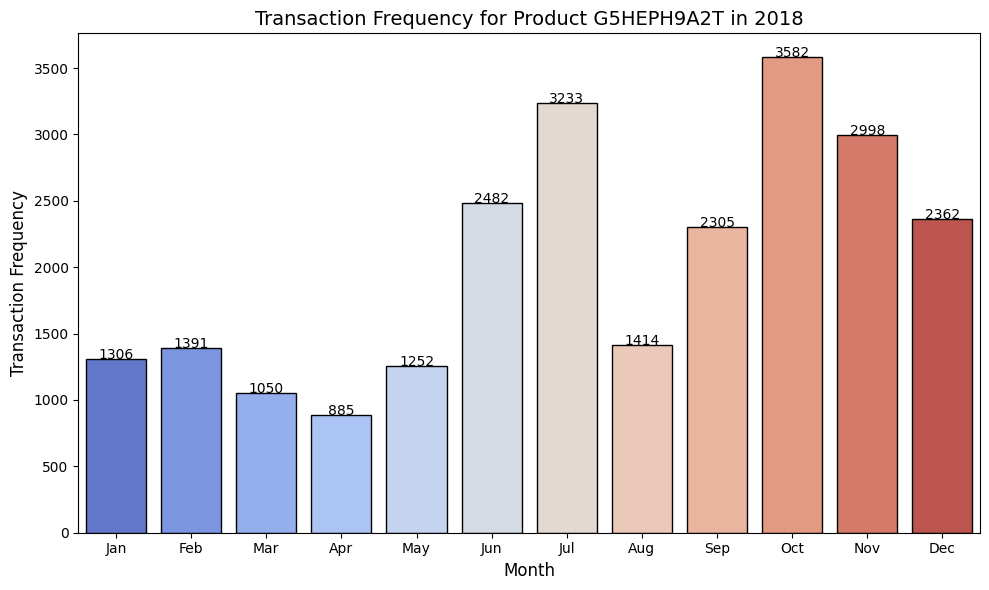

In [ ]:
# Pick any product ID and year 2018
product_id = "G5HEPH9A2T"  # Replace with any actual product ID from your data
year = "2018"

# Get transaction frequency for the selected product and year
monthly_frequency = transactions_frequency(data, product_id, year)

# Plot the transaction frequency per month with a slick design
plot_transactions_frequency(monthly_frequency, product_id, year)

## **Task-3: Top 5 Products by Sales**

### **3.1 Find out which top 5 products have been the biggest moneymakers over the last six months**

In [ ]:
def calculate_date_range(data: pd.DataFrame) -> tuple:
    """
    Calculate the date range for the last six months based on the most recent date in the dataset.

    Args:
        data (pd.DataFrame): A DataFrame containing a 'date' column with datetime objects.

    Returns:
        tuple: A tuple containing two dates:
            - The start date: exactly six months prior to the latest date in the 'date' column.
            - The end date: the latest date found in the 'date' column.
    """
    # Find the most recent date in the dataset
    latest_date = data['date'].max()

    # Ensure the date is timezone-naive, if it's a datetime object
    if pd.api.types.is_datetime64_any_dtype(latest_date):
        latest_date = latest_date.tz_localize(None)

    # Calculate the date range: six months back from the latest date
    end_time = latest_date
    start_time = end_time - relativedelta(months=6)

    return start_time, end_time

In [ ]:
def top_products(data: pd.DataFrame) -> pd.DataFrame:
    """Return the top 5 products over the last six months.

    Args:
        data (pd.DataFrame): Data containing transactions
        start_time (datetime): Start time to filter the data

    Returns:
        pd.DataFrame: Top 5 products over the last six months by sales
    """

    # Convert 'date' column to datetime if not already in datetime format
    if not pd.api.types.is_datetime64_any_dtype(data['date']):
        data['date'] = pd.to_datetime(data['date'])

    # Ensure the 'date' column is timezone-naive
    data['date'] = data['date'].dt.tz_localize(None)

    # Use the calculate_date_range function to get the date range
    six_months_ago, end_time = calculate_date_range(data)

    # Filter data for the last six months
    filtered_data = data[
        (data['date'] >= six_months_ago) & (data['date'] <= end_time)
    ]

    # Group by product_id and count transactions, then sort to find the top 5 products
    top_products = filtered_data.groupby('product_id').size().reset_index(name='total_transactions')

    # Sort by total_transactions in descending order and get the top 5
    top_products = top_products.sort_values(by='total_transactions', ascending=False).head(5)

    # Remove the second sort by product_id to preserve the order by total_transactions
    top_products = top_products.reset_index(drop=True)  # Keep the index clean

    print(top_products)

    return top_products

In [ ]:
def plot_top_products(top_products: pd.DataFrame, start_time: datetime) -> None:
    """Create a plot for the top 5 products by sales.

    Args:
        top_products (pd.DataFrame): Data containing the top 5 products by sales
        six_months_ago (datetime): Start date of the six-month window
        latest_date (datetime): End date of the six-month window
    """
    # Calculate date range using the new function
    six_months_ago, latest_date = calculate_date_range(start_time)

    plt.figure(figsize=(10, 6))

    # Create a bar plot for the top 5 products with updated seaborn usage
    sns.barplot(x=top_products['product_id'], y=top_products['total_transactions'], palette='viridis', edgecolor='black', hue=None, legend=False)

    # Add labels and title
    plt.xlabel('Product ID', fontsize=12)
    plt.ylabel('Total Transactions', fontsize=12)

    # Add the date range to the title to clarify the months
    # plt.title(f'Top 5 Products by Sales in Last 6 months', fontsize=14)
    plt.title(f'Top 5 Products by Sales (from {six_months_ago.strftime("%B %Y")} to {latest_date.strftime("%B %Y")})', fontsize=14)

    # Add numerical labels on top of each bar
    for index, value in enumerate(top_products['total_transactions']):
        plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

   product_id  total_transactions
0  5RPSDK28JR               14105
1  XZ6UVEYK40                8353
2  G5HEPH9A2T                8086
3  XD4I34ED7F                6623
4  VD51ZQPY9D                6438


<ipython-input-18-8276ba43115e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products['product_id'], y=top_products['total_transactions'], palette='viridis', edgecolor='black', hue=None, legend=False)


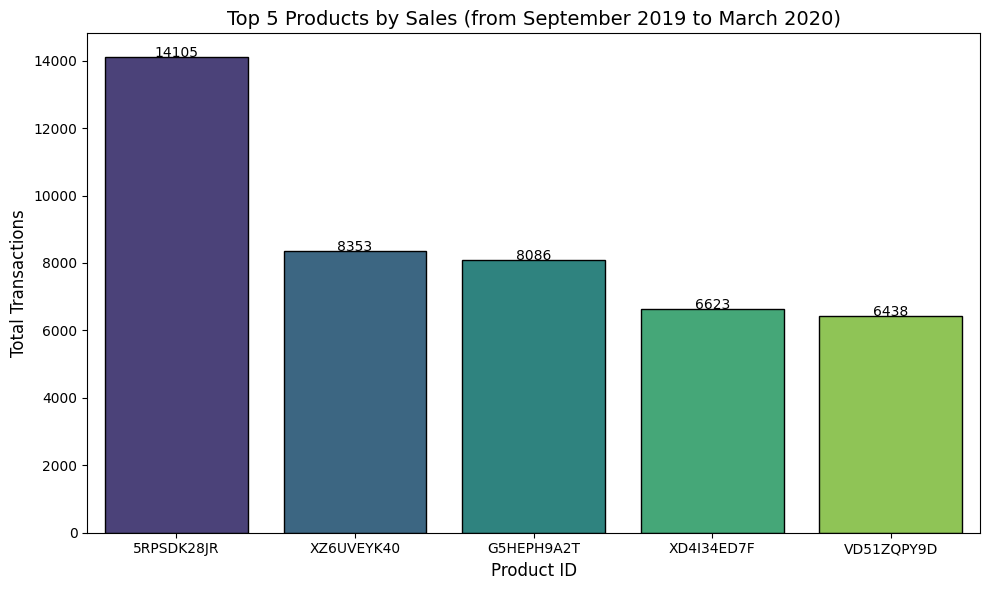

In [ ]:
# Calculating Product Transaction Frequency of Top 5 Products
top_5_products = top_products(data, data['date'].max().tz_localize(None))

# Plot the top 5 products with the full date range in the title
plot_top_products(top_5_products, data['date'].max())

### **3.2 Bonus points if you can spot any seasonal trends**

In [ ]:
def preprocess_data(data: pd.DataFrame) -> pd.DataFrame:
    """Preprocess the data and return a preprocessed DataFrame.

    Criteria:
    - Convert date column to datetime
    - Sort the data by date

    Args:
        data (pd.DataFrame): Data to be preprocessed

    Returns:
        pd.DataFrame: Preprocessed data
    """
    # Convert 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])

    # Sort the data by 'date'
    data = data.sort_values(by='date')

    return data

In [ ]:
def add_date_columns(data: pd.DataFrame) -> pd.DataFrame:
    """Add columns for year, month, and month name.

    Args:
        data (pd.DataFrame): Data containing a 'date' column.

    Returns:
        pd.DataFrame: Data with added 'year', 'month', and 'month_name' columns.
    """
    data['year'] = data['date'].dt.year.astype('int64')
    data['month'] = data['date'].dt.month.astype('int64')
    data['month_name'] = data['date'].dt.strftime('%B')
    return data

In [ ]:
def calculate_yearly_transactions(data: pd.DataFrame) -> pd.DataFrame:
    """Calculate total transactions by year.

    Args:
        data (pd.DataFrame): Data containing customer transactions.

    Returns:
        pd.DataFrame: Total transactions grouped by year.
    """
    yearly_transactions = data.groupby('year').size().reset_index(name='total_transactions')
    print("\nTotal Transactions by Year:")
    print(yearly_transactions)
    return yearly_transactions

In [ ]:
def calculate_month_year_transactions(data: pd.DataFrame) -> pd.DataFrame:
    """Calculate total transactions by year and month.

    Args:
        data (pd.DataFrame): Data containing customer transactions.

    Returns:
        pd.DataFrame: Total transactions grouped by year and month.
    """
    month_year_transactions = data.groupby(['year', 'month', 'month_name']).size().reset_index(name='total_transactions')
    print("\nTotal Transactions by Month-Year Combination:")
    print(month_year_transactions)
    return month_year_transactions

In [ ]:
def calculate_seasonal_months(data: pd.DataFrame) -> list:
    """Identify months with above-average total transactions across all years.

    Args:
        data (pd.DataFrame): DataFrame containing total transactions with 'month' and 'total_transactions' columns.

    Returns:
        list: A list of months where the total transactions are above average.
    """
    monthly_avg = data.groupby('month')['total_transactions'].mean().reset_index()
    seasonal_months = monthly_avg[monthly_avg['total_transactions'] > monthly_avg['total_transactions'].mean()]['month'].values
    return seasonal_months

In [ ]:
def plot_yearly_trends(data: pd.DataFrame, trend_by: str = 'month') -> None:
    """Plot yearly transaction trends based on the provided grouping.

    Args:
        data (pd.DataFrame): Data containing transaction summary.
        trend_by (str): Grouping criteria, either 'month' or 'year'.
    """
    plt.figure(figsize=(10, 6))

    ax = sns.barplot(x=data['year'], y=data['total_transactions'], palette='viridis', edgecolor='black')
    plt.title('Total Transactions by Year', fontsize=14)

    # Adding numerical labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3),
                    textcoords='offset points')

    plt.xlabel(trend_by.capitalize())
    plt.ylabel('Total Transactions')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
def create_line_plot(data: pd.DataFrame) -> None:
    """Create a line plot showing the total transactions per month for multiple years.

    Args:
        data (pd.DataFrame): DataFrame containing total transactions with 'year', 'month', and 'total_transactions' columns.
    """
    plt.figure(figsize=(14, 8))

    # Create a line plot for each year
    sns.lineplot(x='month', y='total_transactions', hue='year', data=data, marker='o', palette='tab10')

    # Adding labels and title
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Transactions', fontsize=12)
    plt.title('Monthly Transaction Trends (2017-2020)', fontsize=16)

    # Customize the x-ticks to show month names
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)

    # Show grid for better visualization
    plt.grid(True)

In [ ]:
def highlight_seasonal_trends(seasonal_months: list) -> None:
    """Highlight seasonal months on the plot and add them to the legend.

    Args:
        seasonal_months (list): List of months with above-average transactions to highlight.
    """
    if seasonal_months is not None and len(seasonal_months) > 0:
        for month in seasonal_months:
            plt.axvspan(month - 0.5, month + 0.5, color='red', alpha=0.2)  # Add shading for seasonal months

        # Add a legend entry for the seasonal trend highlight
        handles, labels = plt.gca().get_legend_handles_labels()
        handles.append(plt.Line2D([0], [0], color='red', lw=4, alpha=0.2))
        labels.append('Seasonal Trend')
        plt.legend(handles=handles, labels=labels, title="Legend")

In [ ]:
def plot_monthly_trends(data: pd.DataFrame, seasonal_months: list = None) -> None:
    """Plot a graph showing the total transactions per month for multiple years with a trend line
    and optionally highlight seasonal months.

    Args:
        data (pd.DataFrame): DataFrame containing total transactions with 'year', 'month', and 'total_transactions' columns.
        seasonal_months (list, optional): List of months with above-average transactions to highlight. Defaults to None.
    """
    create_line_plot(data)  # Plot the line chart
    if seasonal_months is not None and len(seasonal_months) > 0:
        highlight_seasonal_trends(seasonal_months)  # Highlight seasonal months if provided

    # Tight layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

In [ ]:
# Ensure 'date' column is in datetime format
data = preprocess_data(data)

# Add columns for year, month, and month name
data = add_date_columns(data)

# Total transactions by year
yearly_transactions = calculate_yearly_transactions(data)

# Total transactions by month-year combination
month_year_transactions = calculate_month_year_transactions(data)

# Calculate seasonal months
seasonal_months = calculate_seasonal_months(month_year_transactions)


Total Transactions by Year:
   year  total_transactions
0  2017              454893
1  2018              276806
2  2019              219562
3  2020               24694

Total Transactions by Month-Year Combination:
    year  month month_name  total_transactions
0   2017      1    January               12459
1   2017      2   February               32986
2   2017      3      March               37451
3   2017      4      April               24347
4   2017      5        May               42609
5   2017      6       June               60730
6   2017      7       July               44717
7   2017      8     August               36690
8   2017      9  September               41564
9   2017     10    October               57570
10  2017     11   November               49303
11  2017     12   December               14467
12  2018      1    January               12895
13  2018      2   February               14834
14  2018      3      March               13041
15  2018      4      April      

<ipython-input-25-29f46bb9b638>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data['year'], y=data['total_transactions'], palette='viridis', edgecolor='black')


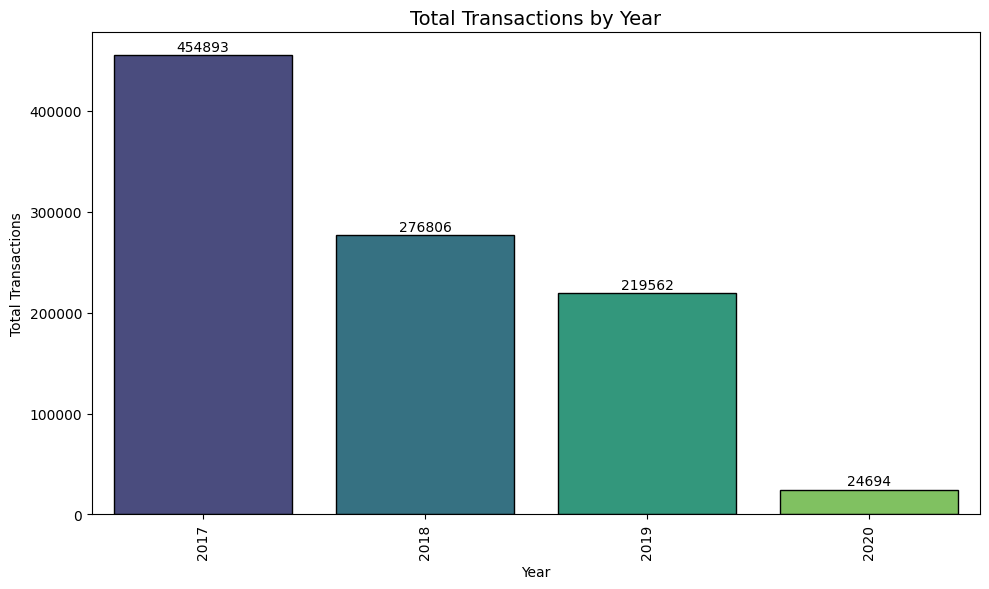

In [ ]:
# Plot total transactions by year)
plot_yearly_trends(yearly_transactions, trend_by='year')

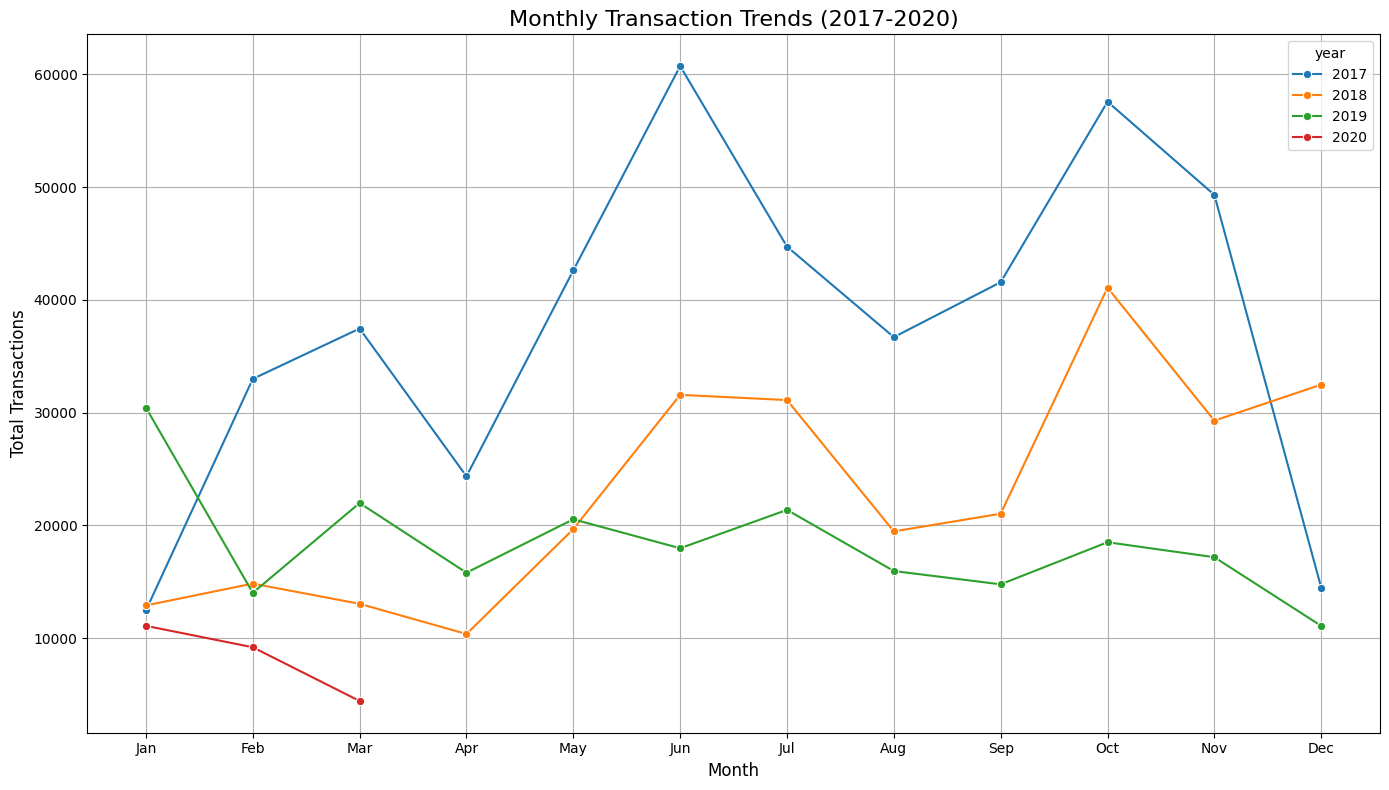

In [ ]:
# Plot Total transactions by month-year combination
plot_monthly_trends(month_year_transactions)

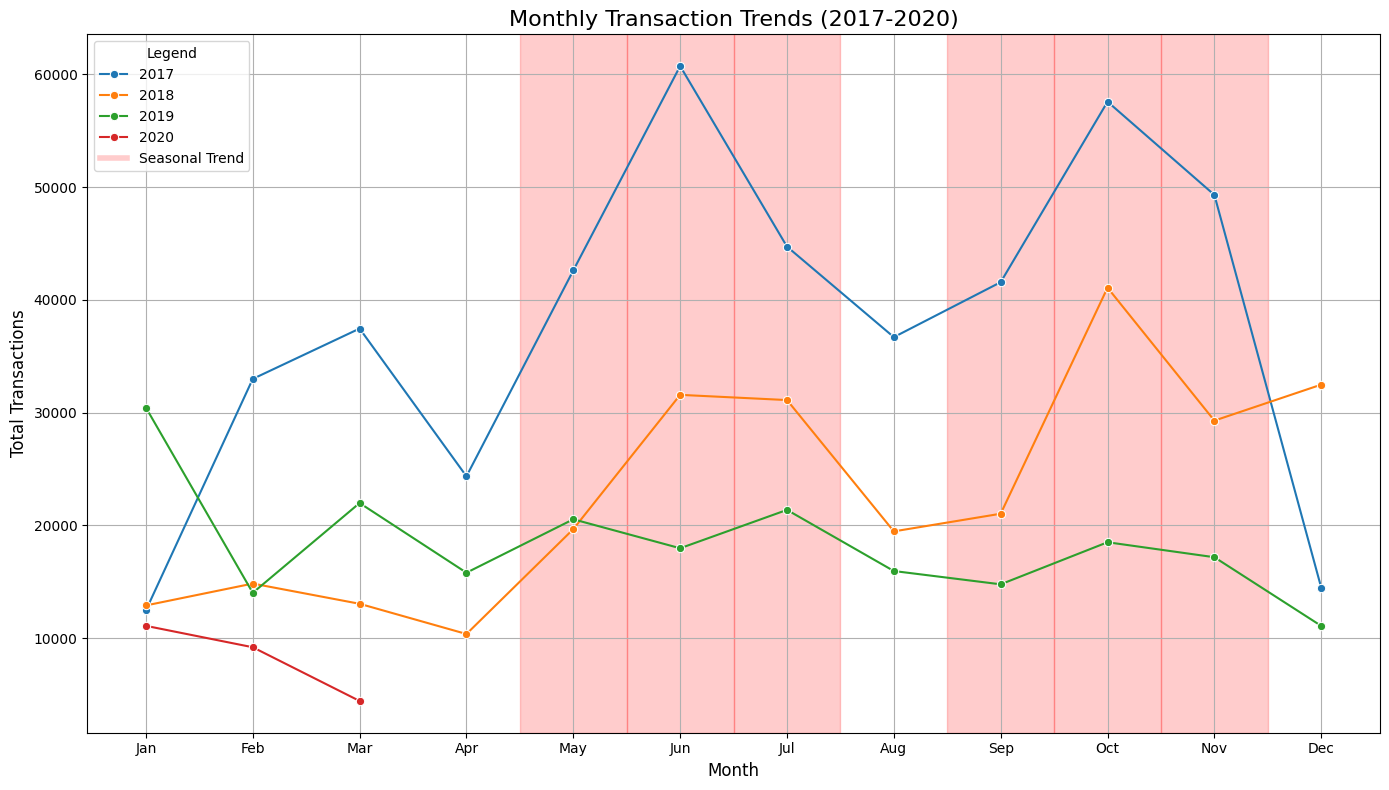

In [ ]:
# Plot yearly trends with seasonal months highlighted
plot_monthly_trends(month_year_transactions, seasonal_months)

There you go with the Seasonal Trend 😊

# **End of Data Exploration and Visualization**